# Net present value

Calculating net present value (NPV) allows one to compare the profitability of two projects by showing the present value of the future cash inflows and outflows of each project. We calculate NPV as
$$
\text{NPV} = \sum_{t=0}^n \frac{\text{CF}_t}{(1+r)^t},
$$
where $\text{CF}_t$ denotes the net cash flow at time $t$ and $r$ is the rate at which we are discounting future cash flows to the present.

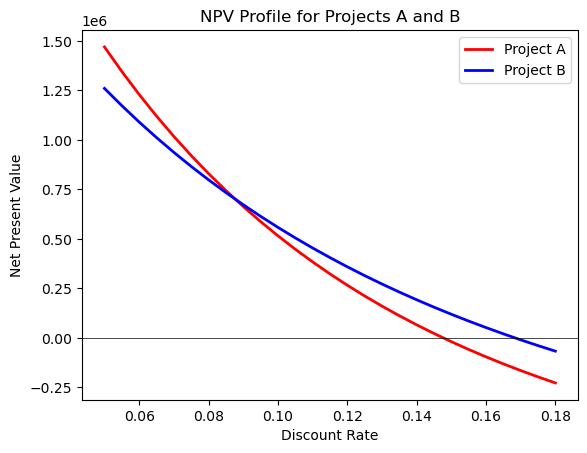

In [2]:
import matplotlib.pyplot as plt

#project a cash flows
project_a = [-1000000, 0, 0, 50000, 50000, 200000, 250000, 250000, 250000, 250000, 375000, 375000, 375000, 375000, 375000, 250000, 250000, 250000, 250000, 100000]

#project b cash flows
project_b = [-1000000, 50000, 50000, 50000, 50000, 250000, 500000, 500000, 500000, 500000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]

discount_rate = [0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18]

#calcules NPV of a project given discount rate (float) and cash flows (list)
def calculate_npv(rate, cash_flow):
    npv = 0
    for t in range(len(cash_flow)):
        npv += cash_flow[t]/(1+rate)**t
    return npv

#calculate NPV for each project at a variety of discount rates
npvs_a = list()
npvs_b = list()
for rate in discount_rate:
    npv_a = calculate_npv(rate,project_a)
    npvs_a.append(npv_a)
    npv_b = calculate_npv(rate,project_b)
    npvs_b.append(npv_b)

#plot graph of NPV vs discount rate for each project
plt.plot(discount_rate,npvs_a, linewidth = 2.0, color = "red", label = "Project A")
plt.plot(discount_rate,npvs_b, linewidth = 2.0, color = "blue", label = "Project B")
plt.axhline(y=0, linewidth = 0.5, color = "black")
plt.title('NPV Profile for Projects A and B')
plt.xlabel('Discount Rate')
plt.ylabel('Net Present Value')
plt.legend()
plt.show()

# Daily log rate of returns

yfinance package: <https://pypi.org/project/yfinance/>

log rate of returns: <https://gregorygundersen.com/blog/2022/02/06/log-returns/>

build a histogram of the daily rates of return for a 6 month period, and calculate the standard deviation of those returns to get a better understanding of the historical volatility of the stock during that 6 month period.

In [25]:
import yfinance as yf

#load in Apple stock data as pandas dataframe
df = yf.download('AAPL', start='2018-01-02', end='2018-06-01').reset_index()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568928,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561859,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750267,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214233,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061153,82271200


0           NaN
1     -0.000174
2      0.004634
3      0.011321
4     -0.003721
         ...   
99    -0.001115
100    0.002283
101   -0.003612
102   -0.002131
103   -0.003366
Name: Daily Log Rate of Return, Length: 104, dtype: float64
0.016128241434466402


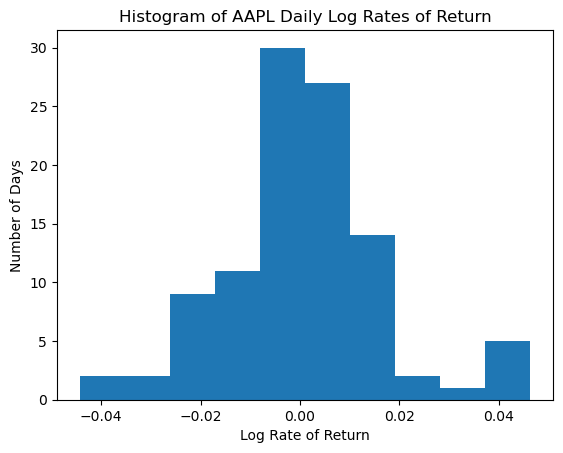

In [26]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

#calculate daily log rate of return as log(p_t/p_{t-1})
df['Daily Log Rate of Return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))

#print daily log rate of return
print(df['Daily Log Rate of Return'])

#calculate standard deviation of daily log rate of return
stdev = np.std(df['Daily Log Rate of Return'])
print(stdev)

plt.hist(df['Daily Log Rate of Return'].dropna())
plt.title('Histogram of AAPL Daily Log Rates of Return')
plt.xlabel('Log Rate of Return')
plt.ylabel('Number of Days')
plt.show()

# Candlestick chart

A candlestick chart plots the daily opening price, closing price, lowest price and highest price of a particular stock, and shows how that price changed each day over a given period of time. Each day is shown by one “candlestick,” and can be helpful when analysts are trying to make predictions about how a particular price of a stock may move in the future.

      Date       Open       High        Low      Close
0  17533.0  42.540001  43.075001  42.314999  43.064999
1  17534.0  43.132500  43.637501  42.990002  43.057499
2  17535.0  43.134998  43.367500  43.020000  43.257500
3  17536.0  43.360001  43.842499  43.262501  43.750000
4  17539.0  43.587502  43.902500  43.482498  43.587502


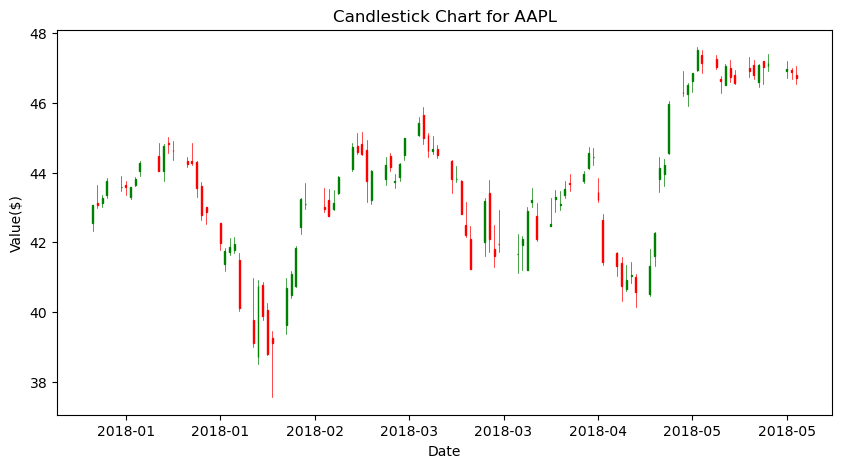

In [27]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

#convert dates to desirable format for candlestick_ohlc function
cndl_df = df.copy()
cndl_df['Date'] = pd.to_datetime(df['Date'])
cndl_df['Date'] = df['Date'].apply(mdates.date2num)

#define new df with columns we want for the plot
candle_data = cndl_df[['Date', 'Open', 'High', 'Low', 'Close']]
print(candle_data.head())

#plot candlestick chart using candlestick_ohlc function
f1, ax = plt.subplots(figsize = (10,5))
candlestick_ohlc(ax,candle_data.values, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Candlestick Chart for AAPL')
plt.xlabel('Date')
plt.ylabel('Value($)')
plt.show()

# Efficient frontiers

build a model portfolio with a basket of stocks, including AAPL, Ford (NYSE: F), Dollar General (NYSE: DG), JetBlue (NASDAQ: JBLU) and Starbucks (NASDAQ: SBUX). construct an “efficient frontier” to visualize the optimal portfolios of the five stocks she is looking into.

In [ ]:
# Code for  performing portfolio optimizations
import pandas as pd
import numpy as np
import cvxopt as opt
from cvxopt import blas, solvers

def return_portfolios(expected_returns, cov_matrix):
    port_returns = []
    port_volatility = []
    stock_weights = []

    selected = (expected_returns.axes)[0]

    num_assets = len(selected)
    num_portfolios = 5000

    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)

    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}

    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]

    df = pd.DataFrame(portfolio)

    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

    df = df[column_order]

    return df


def optimal_portfolio(returns):
    n = returns.shape[1]
    # returns = np.transpose(returns.as_matrix())  # as_matrix() deprecated after 0.23.0
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

#load in data
path='quarters.csv'
stock_data = pd.read_csv(path)
print(stock_data.head())
selected=list(stock_data.columns[1:])

#calculate quarterly expected returns and covariance
returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()
cov_quarterly = returns_quarterly.cov()

random_portfolios = return_portfolios(expected_returns, cov_quarterly) 

weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)
try:
    plt.plot(risks, returns, 'y-o')
except:
    pass
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()

# Rate of return

There are many different kinds of financial assets, or securities, ranging from real estate to government bonds to the common stock. But no matter the type of investment, there are two things that we always need to consider about each asset: the return and the risk.

The rate of return is a measure of the amount of money gained or lost in an investment. A positive return signifies a profit and a negative return indicates a loss. The risk of an investment is defined as the likelihood of suffering a financial loss. There is often a tradeoff between risk and return, where the higher the potential return of an asset, the higher the risk involved.

We define simple rate of return as the difference between the starting and ending price of an investment over a certain time period, divided by the starting price. If the investment returns dividends, we add these to the numerator:
$$
R = \frac{P_f - P_i + D}{P_i}.
$$

In [28]:
def display_as_percentage(val):
    return '{:.1f}%'.format(val * 100)

#function to calculate simple rate of return
def calculate_simple_return(start_price, end_price, dividend=0):
    simple_return = (end_price-start_price+dividend)/start_price
    return simple_return

#example with starting price 200, ending price 250, dividend 20
simple_return = calculate_simple_return(200, 250, 20)
print('The simple rate of return is '+display_as_percentage(simple_return))

The simple rate of return is 35.0%


Another type of return is the logarithmic rate of return, also known as the continuously compounded return. This is the expected return for an investment where the earnings are assumed to be continually reinvested over the time period. It is calculated by taking the difference between the log of the ending price and the log of the starting price:
$$
r = \log(P_f)-\log(P_i) = \log\left(\frac{P_f}{P_i} \right).
$$

In [29]:
from math import log

#function to calculate log return
def calculate_log_return(start_price, end_price):
    log_return = log(end_price/start_price)
    return log_return

#example with starting price 200, ending price 250
log_return = calculate_log_return(200, 250)
print('The log rate of return is '+display_as_percentage(log_return))

The log rate of return is 22.3%


Suppose we know the log rate of return for $n$ days of a given year. To calculate the annual return, we can first take the average of the $n$ daily log returns, then multiple by $252$, the number of trading days in a year. The general formula is:
$$
r = \frac{r_{0_1}+r_{0_2}+\dots+r_{0_n}}{n}\cdot t,
$$
where $t$ is the number of original time periods in a single output time period.

For example, if we know the daily log returns for all $252$ trading days of the year, then we simply sum up all the log returns to get the log return across the new time period:
$$
r = r_{0_1}+r_{0_2}+\dots+r_{0_t}.
$$

In [30]:
daily_returns = [0.002, -0.002, 0.003, 0.002, -0.001]

#returns log returns over new time period
def convert_returns(log_returns, t):
    return sum(log_returns) / len(log_returns) * t

#example converting 5 daily returns to annual return
annual_return = convert_returns(daily_returns, 252)
print('The annual rate of return is', display_as_percentage(annual_return))

The annual rate of return is 20.2%


Investments make up a financial portfolio. Using the simple rate of return makes it easy to aggregate across multiple assets. The portfolio return would simply be the weighted average of each individual asset’s simple rate of return:
$$
R = (W_1\cdot R_1) + (W_2\cdot R_2) + \dots + (W_n\cdot R_n),
$$
where $W_i$ is the weight of the $i$th investment in the portfolio. The weight of each asset is obtained by
$$
W_i = \frac{S_i}{S_1+S_2+\dots+S_n},
$$
where $S_i$ is the starting price of the $i$th investment.

# Variance

One of the key statistics for understanding risk is variance. Variance is a measure of the spread of a dataset, or how far apart each value is from the mean. The greater the variance, the more spread out or variable the data is. An asset with a high variance is generally a riskier one because its return can vary significantly in a short period of time, making it less stable and more unpredictable.

The formula for calculating variance is:
$$
\sigma^2 = \frac{1}{n}\sum_{i=1}^n \left(X_i-\bar{X}\right)^2,
$$
where $\bar{X}$ is the mean of the dataset and $X_i$ is the $i$th value in the dataset.

In [31]:
#returns variance of input list
def calculate_variance(dataset):
    mean = sum(dataset) / len(dataset)
    numerator = 0
    for i in dataset:
        numerator += (i - mean) ** 2
        
    variance = numerator / len(dataset)
    return variance

Variance is sometimes not the easiest statistic to interpret since it does not have the same unit as the original data. As an alternative, it is common to use the standard deviation to describe the spread of the dataset.

Standard deviation is simply the square root of the variance. It has the same unit as the original dataset.
$$
\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n \left(X_i-\bar{X}\right)^2}.
$$

Another important statistic for assessing risk is the correlation between the returns of two assets. Correlation is a measure of how closely two datasets are associated with each other. It is often represented by the correlation coefficient, which is a value that ranges between $-1$ and $1$. This indicates whether there is a positive correlation, negative correlation, or no correlation:

 - Positive correlation – when the rate of return of one asset deviates upward from its mean, the other usually deviates upward as well.
 - Negative correlation – when the rate of return of one asset deviates upward from its mean, the other usually deviates downward.
 - No correlation – when a change in one asset’s rate of return does not dictate a change in another. The correlation coefficient will be close to $0$.
 
Two assets from the same industry generally have a positive correlation, as they are likely affected by similar external conditions. For example, automobile stocks may all be positively correlated with each other. Oil stocks, on the other hand, may be negatively correlated with automobile stocks because high oil costs can negatively impact car sales.

When building a portfolio, it is generally a good idea to include assets that are not correlated with each other. If assets are independent of one another, then there is a lower risk of the financial loss that can occur when assets in a portfolio are correlated. This allows for greater diversification and balances out the overall risk and return of the portfolio.

Given a list of the returns of different assets, we can calculate the correlation coefficient between each pair of assets using the `np.corrcoef` function.

In [33]:
#returns for 4 assets: GM, ford, exxon mobil, apple
returns_general_motors = [0.018, -0.005, -0.047, -0.009, -0.012, 0.003, -0.027, -0.014, 0.029, -0.062, 0.009]
returns_ford = [0.002, -0.004, -0.027, -0.022, -0.001, 0.002, -0.006, -0.017, 0.035, -0.029, 0.002]
returns_exxon_mobil = [0.008, 0.015, 0.009, 0.012, 0.003, -0.007, 0.006, 0.005, -0.048, 0.025, -0.012]
returns_apple = [-0.002, 0.007, -0.004, -0.004, 0.002, 0.013, -0.011, 0.017, -0.001, 0.012, 0.006]

#calculate correlation matrix (i.e. scaled covariance matrix)
corrcoef_matrix = np.corrcoef([returns_general_motors, returns_ford, returns_exxon_mobil, returns_apple])
print(corrcoef_matrix)

[[ 1.          0.84145997 -0.70322462 -0.0518139 ]
 [ 0.84145997  1.         -0.87407739 -0.1286648 ]
 [-0.70322462 -0.87407739  1.          0.09955855]
 [-0.0518139  -0.1286648   0.09955855  1.        ]]


The formula for Pearson's correlation coefficient is as follows:
$$
r_{xy} = \frac{n\cdot \sum_{i=1}^n (X_iY_i) - \left(\sum_{i=1}^n X_i\right)\left(\sum_{i=1}^n Y_i\right)}{\sqrt{n\sum_{i=1}^nX_i^2 - \left(\sum_{i=1}^nX_i\right)^2}\sqrt{n\sum_{i=1}^nY_i^2 - \left(\sum_{i=1}^nY_i\right)^2}}
$$

We implement this verbosely below.

In [36]:
def calculate_correlation(set_x, set_y):
    #sum of all values in each dataset
    sum_x = sum(set_x)
    sum_y = sum(set_y)
    
    #sum of all squared values in each dataset
    sum_x2 = sum([x ** 2 for x in set_x])
    
    sum_y2 = sum([y ** 2 for y in set_y])
        
    #sum of the product of each respective element in each dataset 
    sum_xy = sum([x*y for x, y in zip(set_x, set_y)])
        
    #length of dataset
    n = len(set_x)
    
    #calculate correlation coefficient
    numerator = n * sum_xy - sum_x * sum_y
    denominator = sqrt((n * sum_x2 - sum_x ** 2) * (n * sum_y2 - sum_y ** 2))
    
    return numerator / denominator

# Importing financial data

Many financial institutions, stock markets, and world banks provide large amounts of the data they store to the public.

Most of this data is well organized, live updated, and accessible through the use of an application programming interface (API), which gives programming languages like Python a way to download and import it.

The pandas-datareader module is designed specifically to interact with some of the world’s most popular finance data APIs, and import their data into an easily digestible pandas DataFrame. The documentation is available here: <https://pandas-datareader.readthedocs.io/en/latest/index.html>.

Each finance API is accessed using a different function exposed by pandas-datareader. Generally accessing each API requires a different set of arguments and information that needs to be provided by the programmer.

In [39]:
from pandas_datareader import wb
from datetime import datetime

start = datetime(2005, 1, 1)
end = datetime(2008, 1, 1)
indicator_id = 'NY.GDP.PCAP.KD'

gdp_per_capita = wb.download(indicator=indicator_id, start=start, end=end, country=['US', 'CA', 'MX'])

print(gdp_per_capita)

                    NY.GDP.PCAP.KD
country       year                
Canada        2008    42067.568700
              2007    42106.872427
              2006    41663.512305
              2005    41006.222932
Mexico        2008     9888.139445
              2007     9920.687841
              2006     9847.512822
              2005     9524.742437
United States 2008    53703.962896
              2007    54152.829265
              2006    53596.315237
              2005    52649.571305


In [44]:
import pandas as pd
import numpy as np

#load in data
path='stock_data.csv'
stock_data = pd.read_csv(path)

#compute expected returns
selected=list(stock_data.columns[1:])
returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()

#compute covariance matrix
cov_quarterly = returns_quarterly.cov()

The function `return_portfolios()` accepts the expected returns and covariance matrix for a collection of assets and returns a DataFrame with $5000$ portfolios of random asset weights. Each portfolio includes the following columns:
 - 'Returns' — the expected return of the portfolio
 - 'Volatility' — the standard deviation of the portfolio
 - 'Weight Asset 1' … 'Weight Asset N' — the weights of each asset in the given portfolio.

In [45]:
import random

#define function that generates random portfolios
def return_portfolios(expected_returns, cov_matrix):
    np.random.seed(1)
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)

        portfolio = {'Returns': port_returns,
                     'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df

#test it on the stock data
random_portfolios = return_portfolios(expected_returns, cov_quarterly)

When we have a set of portfolios, we typically plot them on a two-dimensional scatter plot, with standard deviation on the x-axis and expected return on the y-axis. We plot the random portfolios with the following code:

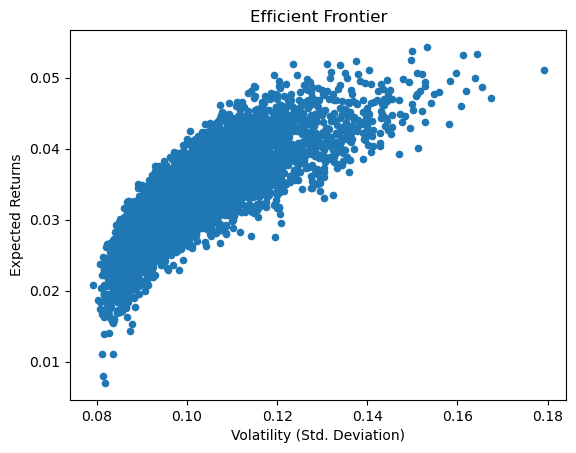

In [47]:
random_portfolios.plot.scatter(x='Volatility', y='Returns')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [51]:
import cvxopt as opt
from cvxopt import blas, solvers

#define optimal portfolio function
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    #calculate risks and returns for frontier
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    #calculate the 2nd degree polynomial of the frontier curve
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    
    #calculate the optimal portfolio
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

     pcost       dcost       gap    pres   dres
 0: -3.6910e-02 -1.0606e+00  1e+00  2e-16  3e+00
 1: -3.7860e-02 -7.0546e-02  3e-02  1e-16  9e-02
 2: -5.6522e-02 -6.1228e-02  5e-03  1e-16  4e-17
 3: -5.8910e-02 -5.9232e-02  3e-04  2e-16  2e-17
 4: -5.9195e-02 -5.9202e-02  7e-06  7e-18  2e-17
 5: -5.9202e-02 -5.9202e-02  7e-08  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6835e-02 -1.0604e+00  1e+00  8e-17  3e+00
 1: -3.7780e-02 -7.0358e-02  3e-02  1e-16  9e-02
 2: -5.6232e-02 -6.0905e-02  5e-03  2e-16  3e-17
 3: -5.8543e-02 -5.8888e-02  3e-04  4e-17  2e-17
 4: -5.8838e-02 -5.8849e-02  1e-05  3e-16  2e-17
 5: -5.8849e-02 -5.8849e-02  1e-07  1e-17  1e-17
 6: -5.8849e-02 -5.8849e-02  1e-09  2e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6751e-02 -1.0602e+00  1e+00  3e-17  3e+00
 1: -3.7691e-02 -7.0148e-02  3e-02  9e-17  9e-02
 2: -5.5918e-02 -6.0547e-02  5e-03  3e-16  3e-17
 3: -5.8147e-02 -5.8507e

 5:  2.8493e-01  2.8493e-01  1e-06  2e-16  2e-16
 6:  2.8493e-01  2.8493e-01  1e-08  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4550e-01 -7.4521e-01  1e+00  2e-16  3e+00
 1:  3.3847e-01  2.6764e-01  7e-02  9e-17  2e-01
 2:  3.2388e-01  3.1695e-01  7e-03  1e-16  2e-05
 3:  3.2181e-01  3.2146e-01  3e-04  1e-16  3e-07
 4:  3.2169e-01  3.2168e-01  2e-05  1e-16  3e-09
 5:  3.2168e-01  3.2168e-01  9e-07  1e-16  1e-11
 6:  3.2168e-01  3.2168e-01  1e-08  1e-16  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8720e-01 -7.0798e-01  1e+00  2e-16  3e+00
 1:  3.7969e-01  3.0724e-01  7e-02  8e-17  2e-01
 2:  3.6495e-01  3.5814e-01  7e-03  1e-16  2e-04
 3:  3.6300e-01  3.6266e-01  3e-04  4e-17  3e-06
 4:  3.6290e-01  3.6288e-01  1e-05  5e-17  3e-08
 5:  3.6289e-01  3.6289e-01  7e-07  2e-16  2e-10
 6:  3.6289e-01  3.6289e-01  7e-09  1e-16  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres


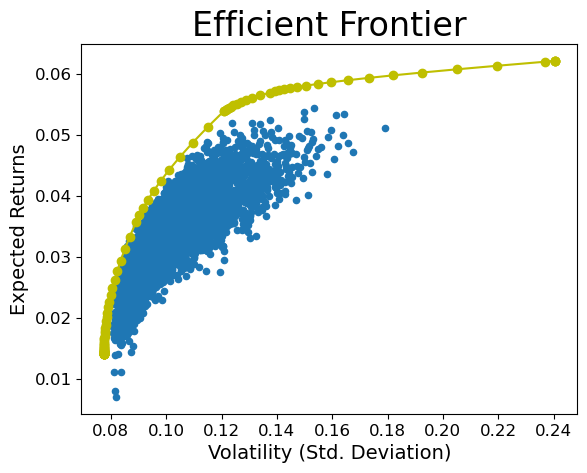

In [52]:

weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)
try:
    plt.plot(risks, returns, 'y-o')
except:
    pass
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()

In [53]:
print(weights)

[[9.99998579e-01]
 [2.00534033e-07]
 [2.72458226e-08]
 [2.27392471e-08]
 [1.13628679e-06]
 [3.38584991e-08]]


In [61]:
print('Expected return of optimal portfolio:', display_as_percentage((expected_returns @ weights)[0]))

Expected return of optimal portfolio: 6.2%
